In [149]:
# %pip install matplotlib
# %pip install numpy
# %pip install scikit-learn

In [150]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import math


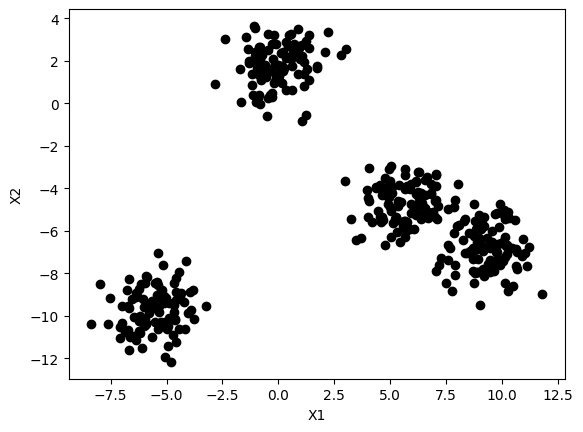

In [151]:
data, lx = make_blobs(n_samples=400, n_features=2, centers=4)
plt.scatter(data[:,0],data[:,1], marker='o', color="black")
plt.xlabel('X1')
plt.ylabel('X2')

plt.show()

In [152]:
def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

In [153]:
def printPlot(data, cluster, centroids):
    markers = ['o', 'v', '^', '*', 'X']
    colors = ['red', 'purple', 'green', 'orange', 'cyan']

    for i in range(len(data)):
        plt.plot(data[i, 0], data[i, 1], marker=markers[cluster[i]], color=colors[cluster[i]], markersize=10)

    for i in range(len(centroids)):
        plt.plot(centroids[i, 0], centroids[i, 1], marker=markers[i], color=colors[i], markersize=15, markeredgewidth=1.5, markeredgecolor='black')

    plt.show()

In [154]:
def kmeans(data, n_clusters=2):
    
    index = np.random.choice(len(data), size=n_clusters, replace=False)
    centroids = data[index].copy()

    clusters = np.zeros(len(data),dtype=int)
    
    while True:
        
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)**2
        clusters = np.argmin(distances, axis=1)
        
        #printPlot(data, clusters, centroids)
        
        new_centroids = np.zeros_like(centroids)

        for i in range(n_clusters):
            curr_cluster = (clusters == i)
            if np.any(curr_cluster):
                new_centroids[i] = data[curr_cluster].mean(axis=0)
            else:
                data[np.random.choice(len(data))]
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
            
    return clusters.tolist(), centroids


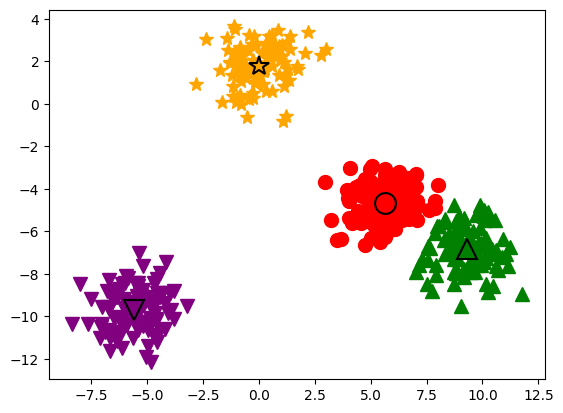

In [155]:
cluster,centroids=kmeans(data=data, n_clusters=4)
printPlot(data,cluster,centroids)